***This RandomForestClassifier model predicts cardiovascular fitness levels (Fit, Average, At Risk) using features like heart rate, VO₂ Max, walking distance, etc.***

 **Install and Import Libraries**

In [17]:
%pip install pandas scikit-learn joblib seaborn

Note: you may need to restart the kernel to use updated packages.


In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import joblib
import os

**Load & Clean Data**

In [19]:
df = pd.read_csv("../data/raw/synthetic_cardio_health_data.csv")
df.head()

,user_id,date,RestingHeartRate,HeartRate,WalkingHeartRate,HeartRateVariability,DistanceWalkingRunning,ActiveEnergyBurned,VO2Max,FlightsClimbed,cardio_status
0,u001,2018-01-01,73.3,72.2,106.3,51.9,0.88,46.2,24.8,5,At Risk
1,u001,2018-01-02,67.3,83.5,91.8,51.5,-1.18,-52.6,30.4,13,Average
2,u001,2018-01-03,80.0,101.7,121.8,13.1,5.16,246.4,36.9,12,At Risk
3,u001,2018-01-04,52.2,63.9,82.4,43.1,1.88,80.2,36.1,7,Average
4,u001,2018-01-05,67.7,80.2,91.7,44.7,3.45,148.1,34.3,6,Average


In [20]:
features = [
    "RestingHeartRate",
    "HeartRate",
    "WalkingHeartRate",
    "VO2Max",
    "DistanceWalkingRunning",
    "ActiveEnergyBurned",
    "FlightsClimbed"
]
target = "cardio_status"

df.dropna(subset=features + [target], inplace=True)

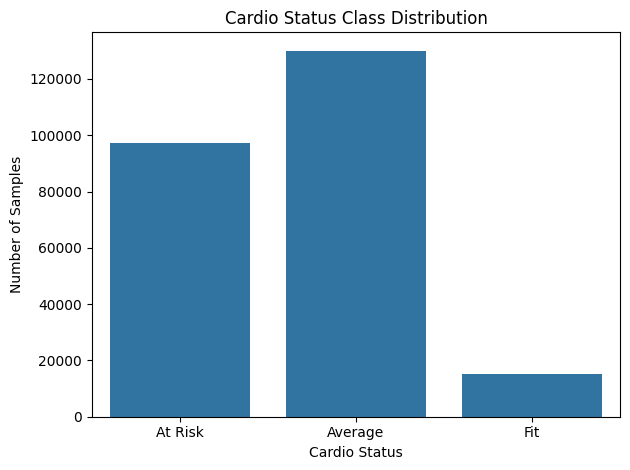

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="cardio_status", data=df)
plt.title("Cardio Status Class Distribution")
plt.ylabel("Number of Samples")
plt.xlabel("Cardio Status")
plt.tight_layout()
plt.show()

**Prepare Training Model**

In [22]:
X = df[features]
y = df[target]

In [23]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [24]:
# Train the Random Forest Classifier
model = RandomForestClassifier(n_estimators=1000, random_state=41)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000, random_state=41)

**Evaluate the Model**

In [25]:
y_pred = model.predict(X_test)

print("✅ Accuracy:", round(accuracy_score(y_test, y_pred), 4))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


✅ Accuracy: 0.9319

Confusion Matrix:
[[18496   929    49]
 [  701 25259    55]
 [  644   926  1488]]

Classification Report:
              precision    recall  f1-score   support

     At Risk       0.93      0.95      0.94     19474
     Average       0.93      0.97      0.95     26015
         Fit       0.93      0.49      0.64      3058

    accuracy                           0.93     48547
   macro avg       0.93      0.80      0.84     48547
weighted avg       0.93      0.93      0.93     48547



In [26]:
# from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

     At Risk       0.93      0.95      0.94     19474
     Average       0.93      0.97      0.95     26015
         Fit       0.93      0.49      0.64      3058

    accuracy                           0.93     48547
   macro avg       0.93      0.80      0.84     48547
weighted avg       0.93      0.93      0.93     48547



**Confusion Matrix (using Seaborn)**

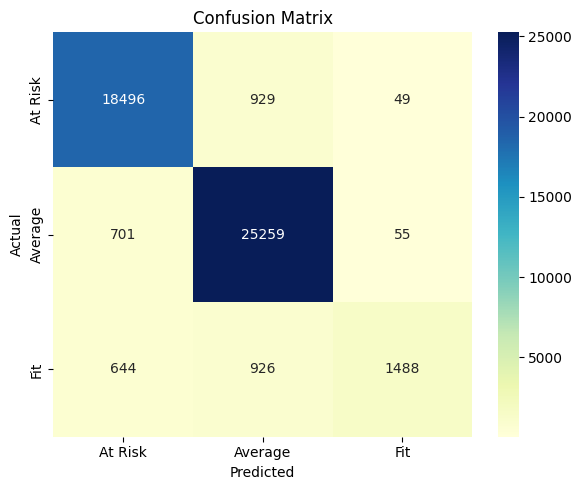

In [27]:
# import seaborn as sns
# import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

labels = model.classes_

cm = confusion_matrix(y_test, y_pred, labels=labels)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()


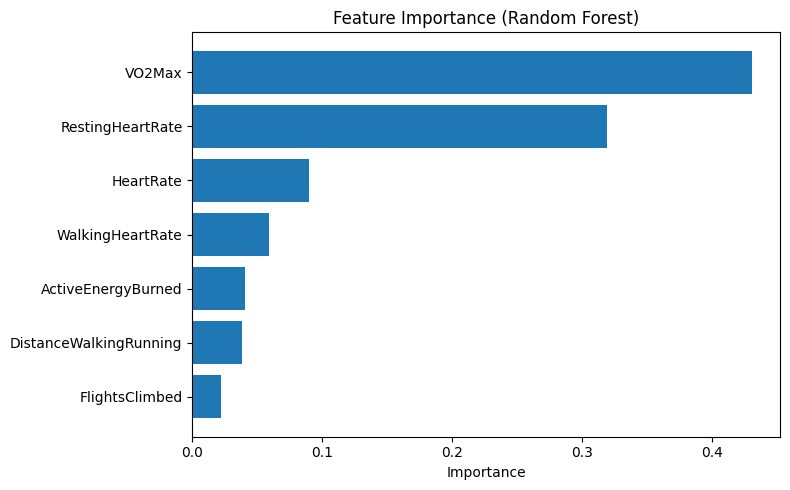

In [28]:
importances = model.feature_importances_
feature_names = X.columns

# Sort feature importances
indices = importances.argsort()[::-1]

plt.figure(figsize=(8, 5))
plt.barh(range(len(importances)), importances[indices], align='center')
plt.yticks(range(len(importances)), [feature_names[i] for i in indices])
plt.xlabel("Importance")
plt.title("Feature Importance (Random Forest)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


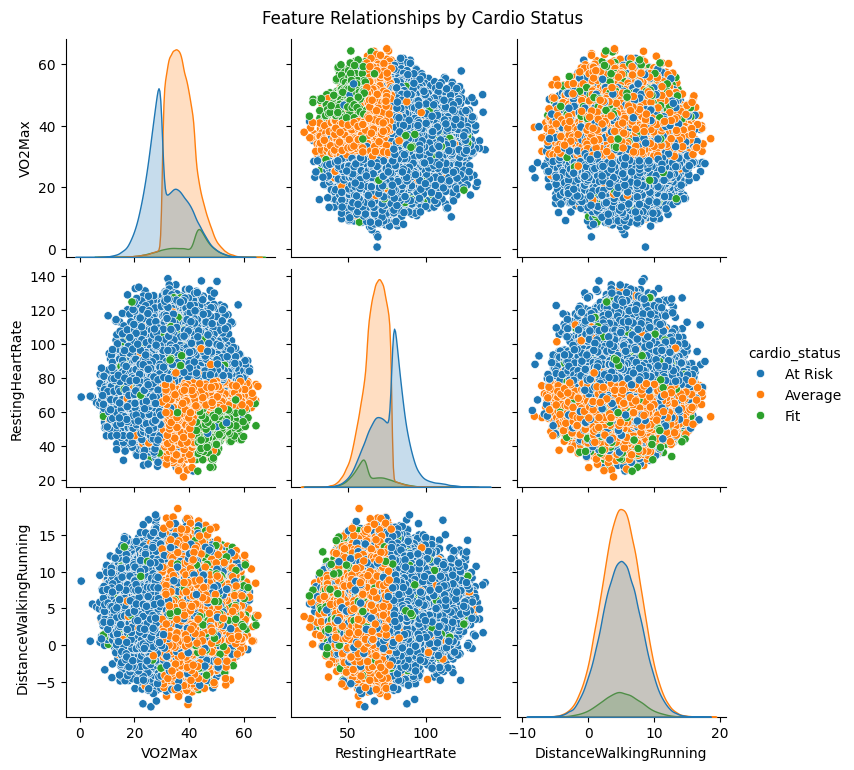

In [29]:
sns.pairplot(df, vars=["VO2Max", "RestingHeartRate", "DistanceWalkingRunning"], hue="cardio_status")
plt.suptitle("Feature Relationships by Cardio Status", y=1.02)
plt.show()

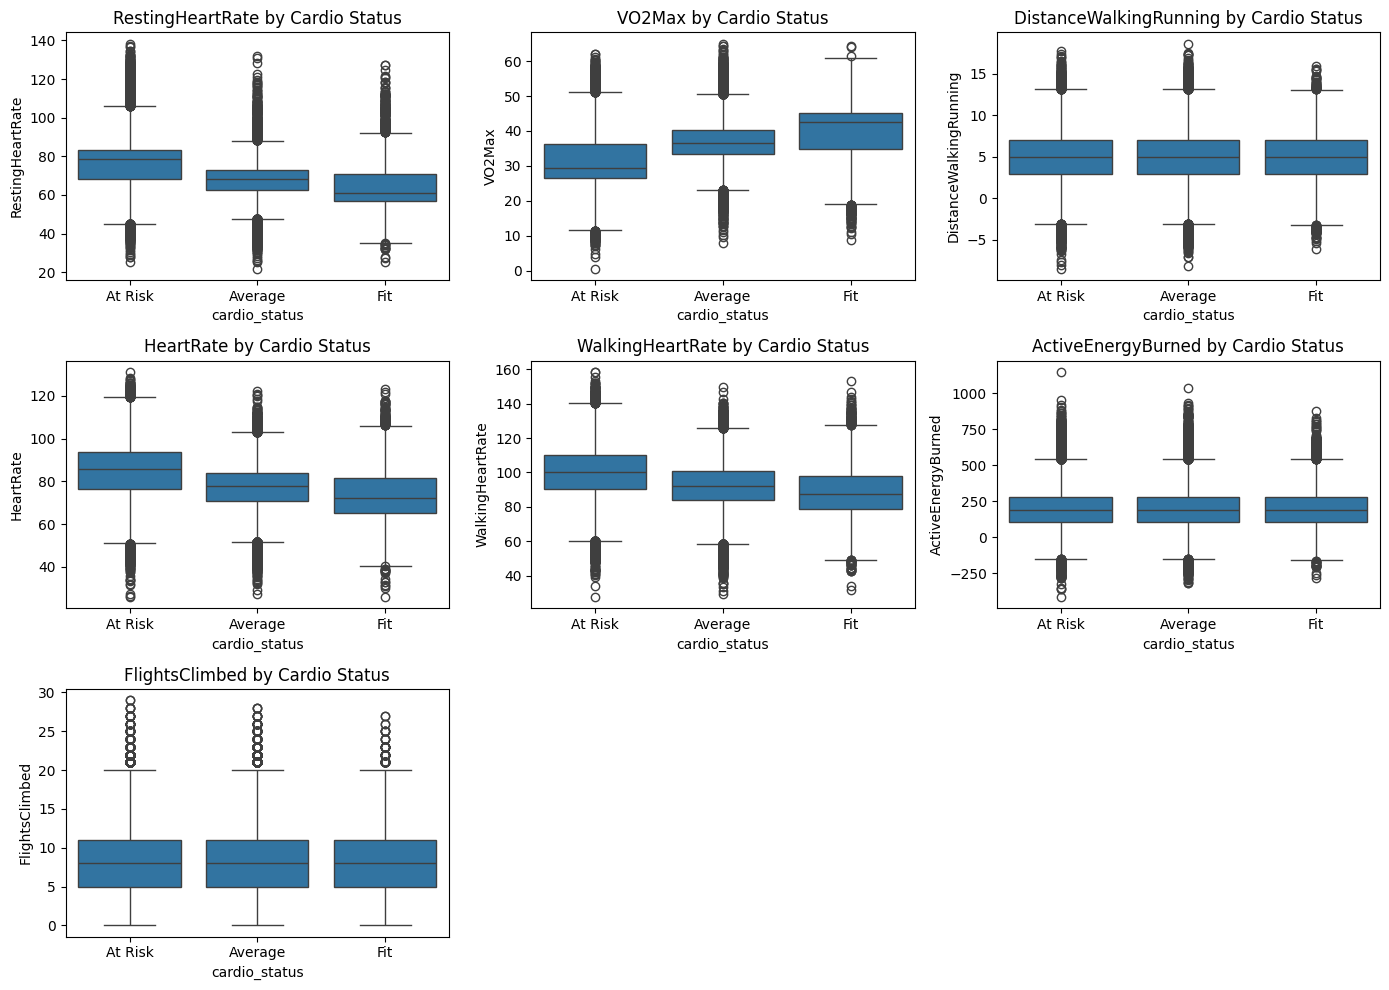

In [30]:
features = [
    "RestingHeartRate", "VO2Max", "DistanceWalkingRunning",
    "HeartRate", "WalkingHeartRate", "ActiveEnergyBurned", "FlightsClimbed"
]

plt.figure(figsize=(14, 10))
for i, col in enumerate(features):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(data=df, x="cardio_status", y=col)
    plt.title(f"{col} by Cardio Status")
    plt.tight_layout()
plt.show()


**Cell Interpertation**

In [31]:
acc = accuracy_score(y_test, y_pred)
print(f"✅ Overall Accuracy: {round(acc*100, 2)}%")

# Short explanation
if acc > 0.95:
    performance = "Excellent"
elif acc > 0.9:
    performance = "Very good"
elif acc > 0.85:
    performance = "Acceptable"
else:
    performance = "Needs improvement"

print(f"\n🔍 Model Performance: {performance}")
print("\nThis model predicts cardiovascular fitness levels (Fit, Average, At Risk) using features like heart rate, VO₂ Max, walking distance, etc.")
print("Higher feature importance values indicate which metrics the model relied on most.\n")

# Print top 3 features
top_features = [feature_names[i] for i in indices[:3]]
print(f"📌 Most influential features: {', '.join(top_features)}")


✅ Overall Accuracy: 93.19%

🔍 Model Performance: Very good

This model predicts cardiovascular fitness levels (Fit, Average, At Risk) using features like heart rate, VO₂ Max, walking distance, etc.
Higher feature importance values indicate which metrics the model relied on most.

📌 Most influential features: VO2Max, RestingHeartRate, HeartRate


**Save the Model**

In [32]:
os.makedirs("../models", exist_ok=True)
joblib.dump(model, "../models/cardio_rf_model.pkl")
print("✅ Model saved to '../models/cardio_rf_model.pkl'")

✅ Model saved to '../models/cardio_rf_model.pkl'
